In [2]:
import tensorflow as tf
from tensorflow import keras

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [12]:
import matplotlib.pyplot as plt

In [3]:
tf.__version__


'2.4.1'

In [4]:
keras.__version__

'2.4.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [31]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [32]:
y_train_full[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

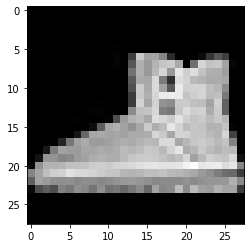

In [33]:
plt.imshow(X_train[4], cmap = "gray")

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]), 
    keras.layers.Dense(300, activation = "relu"), 
    keras.layers.Dense(100, activation = "relu"), 
    keras.layers.Dense(10, activation = "softmax")
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0115 - accuracy: 0.6856 - val_loss: 0.5069 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5031 - accuracy: 0.8255 - val_loss: 0.4842 - val_accuracy: 0.8292
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4532 - accuracy: 0.8425 - val_loss: 0.4382 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8546 - val_loss: 0.3946 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4016 - accuracy: 0.8586 - val_loss: 0.4022 - val_accuracy: 0.8556
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8647 - val_loss: 0.3779 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3702 - accuracy: 0.8706 - val_loss: 0.3755 - val_accuracy:

(0.0, 1.0)

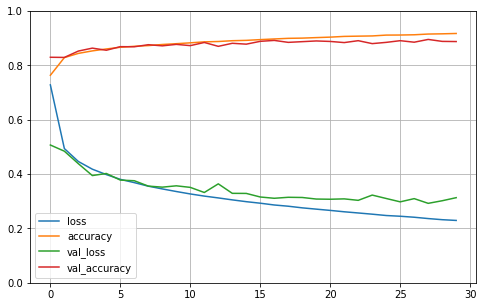

In [39]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)


In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 55.7615 - accuracy: 0.8605


[55.76146697998047, 0.8604999780654907]

In [41]:
X_new = X_test[:3]

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [45]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')